On utilise un rdf contrnant les etudiants, les universités ainsi que les lieux de localités de ces universités.
L'objectif est de générer une requête à partir d'un graphe d'entrée et d'autres informations suplémentaire fournies par l'utilisateur. 

In [1]:
from rdflib import Graph, URIRef, RDF, Literal, FOAF, Namespace
import networkx as nx
import matplotlib.pyplot as plt
import collections

Données d'entrée

In [2]:
g=Graph()
graphe = g.parse("exemples_ontologies/exemple3.rdf")

In [7]:
query = """
    
    PREFIX ex: <http://example.org/>

    Select ?studentName ?universityName ?cityName
    WHERE {
    ?student rdf:type ex:Student ;
        ex:name ?studentName ;
        ex:studiesAt ?university .

    ?university rdf:type ex:University ;
        ex:name ?universityName ;
        ex:locatedIn ?city .

    ?city rdf:type ex:City ;
            ex:name "IDF" ;
            ex:name ?cityName .
    }

"""

results = graphe.query(query)
for row in results:
    print(row)

(rdflib.term.Literal('Aissatou'), rdflib.term.Literal('IPSL'), rdflib.term.Literal('IDF'))
(rdflib.term.Literal('Wang'), rdflib.term.Literal('IPSL'), rdflib.term.Literal('IDF'))
(rdflib.term.Literal('Ami'), rdflib.term.Literal('IPSL'), rdflib.term.Literal('IDF'))
(rdflib.term.Literal('Amet'), rdflib.term.Literal('Sorbone'), rdflib.term.Literal('IDF'))
(rdflib.term.Literal('Zoubida'), rdflib.term.Literal('Sorbone'), rdflib.term.Literal('IDF'))


In [11]:
query2 = """
    
    PREFIX ex: <http://example.org/>
	SELECT ?studentName ?universityName ?cityName
	WHERE {
		?student ex:name ?studentName ; ex:studiesAt ?university .
		?university ex:name ?universityName ; ex:locatedIn ?city .
		?city ex:name ?cityName .
		FILTER (?cityName = 'IDF')
        FILTER (?studentName = 'Aissatou' || ?studentName = 'Zoubida')
	}	
    

"""

results2 = graphe.query(query2)
for row in results2:
    print(row)

(rdflib.term.Literal('Aissatou'), rdflib.term.Literal('IPSL'), rdflib.term.Literal('IDF'))
(rdflib.term.Literal('Zoubida'), rdflib.term.Literal('Sorbone'), rdflib.term.Literal('IDF'))


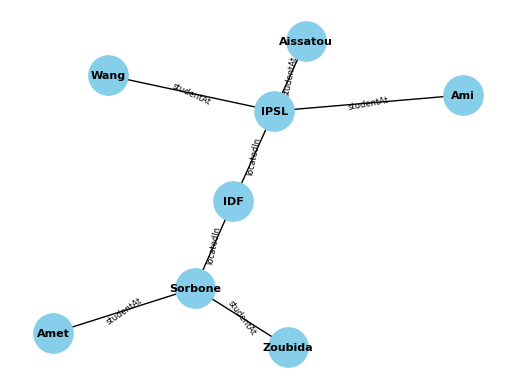

In [8]:
G = nx.Graph()

# Parcourir les résultats de la requête SPARQL et ajouter les nœuds et les arêtes
for row in results:
    student_name, university_name, city_name = row
    G.add_node(student_name, type='student')
    G.add_node(university_name, type='university')
    G.add_node(city_name, type='city')
    G.add_edge(student_name, university_name, relation="studentAt", length=100)
    G.add_edge(university_name, city_name, relation="locatedIn", length=30)

# Définir les positions des nœuds pour le dessin
pos = nx.spring_layout(G,seed=42)

edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)
# Dessiner le graphique
nx.draw(G, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=8, font_weight='bold')

# Afficher le graphique
plt.show()

Passer du graph au RDF pour récuperer les triplets

In [9]:
from rdflib import Graph, URIRef, Literal, Namespace, RDF

# Créer un graphe RDF
rdf_graph = Graph()

# Définir un espace de noms pour votre ontologie RDF
ex = Namespace("http://example.org/")

# Ajouter les nœuds en tant que ressources dans le graphe RDF
for node in G.nodes():
    node_uri = URIRef(ex[node])  # Créer un URI pour le nœud
    rdf_graph.add((node_uri, RDF.type, ex.Node))  # Ajouter un triplet pour le type de nœud
    
    # Ajouter d'autres propriétés du nœud en tant que triplets
    for key, value in G.nodes[node].items():
        property_uri = URIRef(ex[key])  # Créer un URI pour la propriété
        rdf_graph.add((node_uri, property_uri, Literal(value)))  # Ajouter un triplet pour la propriété

# Ajouter les arêtes en tant que triplets dans le graphe RDF
for edge in G.edges():
    source_uri = URIRef(ex[edge[0]])  # URI pour le nœud source
    target_uri = URIRef(ex[edge[1]])  # URI pour le nœud cible
    rdf_graph.add((source_uri, ex.hasEdge, target_uri))  # Ajouter un triplet pour l'arête

Récupération des triplets

In [59]:
query_trp = """
SELECT ?s ?p ?o
WHERE {
  ?s ?p ?o .
}
"""

# Exécutez la requête et récupérez les triplets correspondants
triplets = rdf_graph.query(query_trp)

# Affichez les triplets
for row in triplets:
    print(row)

(rdflib.term.URIRef('http://example.org/Amet'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://example.org/Node'))
(rdflib.term.URIRef('http://example.org/IPSL'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://example.org/Node'))
(rdflib.term.URIRef('http://example.org/IPSL'), rdflib.term.URIRef('http://example.org/type'), rdflib.term.Literal('university'))
(rdflib.term.URIRef('http://example.org/Zoubida'), rdflib.term.URIRef('http://example.org/type'), rdflib.term.Literal('student'))
(rdflib.term.URIRef('http://example.org/IPSL'), rdflib.term.URIRef('http://example.org/hasEdge'), rdflib.term.URIRef('http://example.org/IDF'))
(rdflib.term.URIRef('http://example.org/IPSL'), rdflib.term.URIRef('http://example.org/hasEdge'), rdflib.term.URIRef('http://example.org/Wang'))
(rdflib.term.URIRef('http://example.org/Wang'), rdflib.term.URIRef('http://example.org/type'), rdflib.term.Literal('stu

In [73]:
#temlate si il donne le nom d'un etudiant
#template si il donne le nom d'une ville
#template si il donne le nom d'une université
#etc
#-----------------------------------------------------------------------------------------#
#Use LLM to generate the query when the user give the graph
#Extract the Namespace from the first RDF
#Analyser le graphe RDF résultant pour extraire les triplets.
#Utiliser ces triplets pour construire dynamiquement la clause WHERE de la requête SPARQL.
#Laisser l'utilisateur spécifier les variables à sélectionner dans la clause SELECT.